In [21]:
!pip install -q qiskit
!pip install -q pylatexenc
!pip install -q qiskit_aer

In [22]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

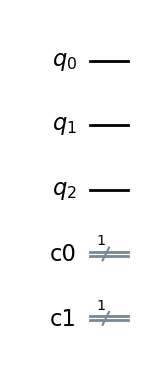

In [ ]:
qr = QuantumRegister(3,'q')#q0=transported qubit,q1 and q2=entangled qubits
cr0 = ClassicalRegister(1,'c0')#c0=measurement of transported qubit
cr1 = ClassicalRegister(1,'c1')#c1=measurement of entangled qubit
qc = QuantumCircuit(qr, cr0, cr1)
qc.draw(output='mpl')

In [24]:
from qiskit.visualization import matplotlib
import matplotlib.pyplot as plt

Prepare the state to be teleported on q0

In [25]:
qc.h(qr[0]) 

Create  A bell state between q1 and q2

In [26]:
qc.h(qr[1])
qc.cx(qr[1],qr[2])

Entangle the message qubit (q0) with (q1)

In [27]:
qc.cx(qr[0],qr[1])
qc.h(qr[0])

Measurement of qubit 0 and 1

In [28]:
qc.measure(qr[0],cr0[0])#measure qubit 0
qc.measure(qr[1],cr1[0])#measure qubit 1

Conditional on the measurement of qubit 1, apply a gate to qubit 2

In [32]:
# Step 5: Conditional corrections using `if_test`
with qc.if_test((cr0, 1)):
    qc.z(qr[2])
with qc.if_test((cr1, 1)):
    qc.x(qr[2])

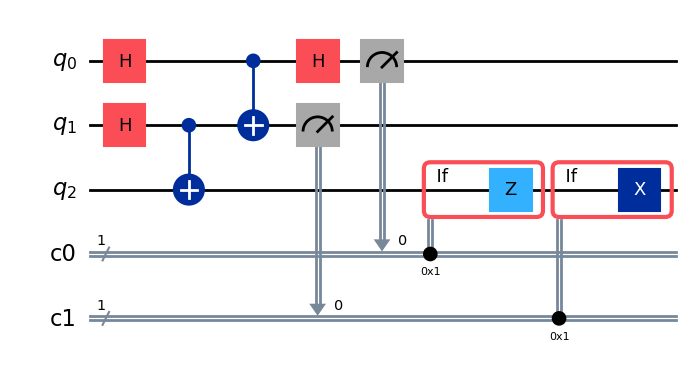

In [30]:
qc.draw('mpl')

In [36]:
from qiskit_aer import Aer
from qiskit import transpile


In [37]:
from qiskit.visualization import plot_histogram

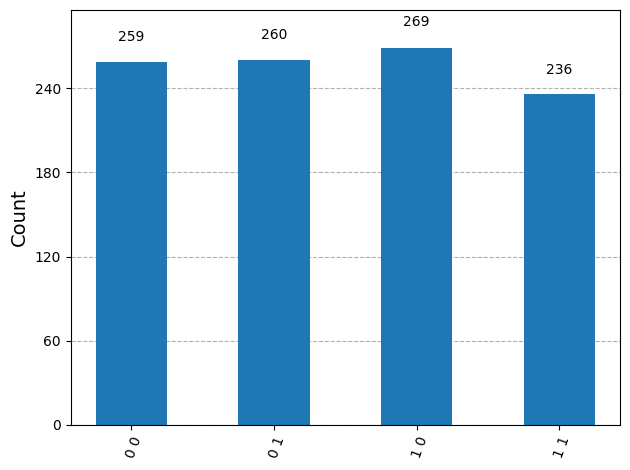

In [41]:
# Step 7: Simulate the circuit
simulator = Aer.get_backend('aer_simulator')
qc = transpile(qc, simulator)
result = simulator.run(qc).result()
counts = result.get_counts(qc)

# Step 8: Show measurement results
plot_histogram(counts)
